# House Price Prediction

## Let's import some Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

## Let's import data

In [2]:
data = pd.read_csv(r'E:\Projects DB\house-prices-advanced-regression-techniques\train.csv')
data.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
5         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
6         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
7         Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
8         Lvl    AllPub    Inside       Gtl      OldTown     Artery   
9         Lvl    AllPub    Corner       Gtl      BrkSide     Artery   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   
5       Norm     1Fam     1.5Fin            5            5       1993   
6       Norm     1Fam     1Story            8            5       2004   
7       Norm     1Fam     2Story            7            6       1973   
8       Norm     1Fam     1.5Fin            7            5       1931   
9     Artery   2fmCon     1.5Unf            5            6       1939   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
5          1995     Gable  CompShg     VinylSd     VinylSd       None   
6          2005     Gable  CompShg     VinylSd     VinylSd      Stone   
7          1973     Gable  CompShg     HdBoard     HdBoard      Stone   
8          1950     Gable  CompShg     BrkFace     Wd Shng       None   
9          1950     Gable  CompShg     MetalSd     MetalSd       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   
5         0.0        TA        TA       Wood       Gd       TA           No   
6       186.0        Gd        TA      PConc       Ex       TA           Av   
7       240.0        TA        TA     CBlock       Gd       TA           Mn   
8         0.0        TA        TA     BrkTil       TA       TA           No   
9       

In [3]:
df = data.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

## Features with NaN

In [5]:
var_with_na = [var for var in df.columns if df[var].isnull().sum()>1]
var_with_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

### Missing LotFrontage is repalced with mean value.

In [6]:
df['LotFrontage'] = np.where(df['LotFrontage'].isnull(), df['LotFrontage'].mean(), df['LotFrontage'])
df['LotFrontage'].mean()

70.04995836802642

In [7]:
df['MasVnrType'].isnull().sum()

8

In [8]:
df['MasVnrArea'].isnull().sum()

8

### MasVnrType and MasVnrArea are missing on the same record. So, missing data can be filled with 'None' and 0 respectively.

In [9]:
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

In [10]:
print(df['MasVnrType'][973], df['MasVnrArea'][973])

None 0.0


### Categorical features to be filled with 'missing'
1. Alley
2. MiscFeature

In [11]:
df['Alley'] = df['Alley'].fillna('missing')
df['MiscFeature'] = df['MiscFeature'].fillna('None')

In [12]:
df[df['BsmtExposure'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley  \
17      18          90       RL    72.000000    10791   Pave  missing   
39      40          90       RL    65.000000     6040   Pave  missing   
90      91          20       RL    60.000000     7200   Pave  missing   
102    103          90       RL    64.000000     7018   Pave  missing   
156    157          20       RL    60.000000     7200   Pave  missing   
182    183          20       RL    60.000000     9060   Pave  missing   
259    260          20       RM    70.000000    12702   Pave  missing   
342    343          90       RL    70.049958     8544   Pave  missing   
362    363          85       RL    64.000000     7301   Pave  missing   
371    372          50       RL    80.000000    17120   Pave  missing   
392    393          20       RL    70.049958     8339   Pave  missing   
520    521         190       RL    60.000000    10800   Pave     Grvl   
532    533          20       RL    60.000000     7200   Pave  missing   
533    534          20       RL    50.000000     5000   Pave  missing   
553    554          20       RL    67.000000     8777   Pave  missing   
646    647          20       RL    60.000000     7200   Pave  missing   
705    706         190       RM    70.000000     5600   Pave  missing   
736    737          90       RL    60.000000     8544   Pave  missing   
749    750          50       RL    50.000000     8405   Pave  missing   
778    779          90       RH    60.000000     8400   Pave  missing   
868    869          60       RL    70.049958    14762   Pave  missing   
894    895          90       RL    64.000000     7018   Pave  missing   
897    898          90       RL    64.000000     7018   Pave  missing   
948    949          60       RL    65.000000    14006   Pave  missing   
984    985          90       RL    75.000000    10125   Pave  missing   
1000  1001          20       RL    74.000000    10206   Pave  missing   
1011  1012          90       RL    75.000000     9825   Pave  missing   
1035  1036          20       RL    70.049958    11500   Pave  missing   
1045  1046          20       RL    70.049958    13680   Pave  missing   
1048  1049          20       RL   100.000000    21750   Pave  missing   
1049  1050          20       RL    60.000000    11100   Pave  missing   
1090  1091          90       RL    60.000000     8544   Pave  missing   
1179  1180          20       RL    77.000000     8335   Pave  missing   
1216  1217          90       RM    68.000000     8930   Pave  missing   
1218  1219          50       RM    52.000000     6240   Pave  missing   
1232  1233          90       RL    70.000000     9842   Pave  missing   
1321  1322          20       RL    70.049958     6627   Pave  missing   
1412  1413          90       RL    60.000000     7200   Pave  missing   

     LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
17        Reg         Lvl    AllPub    Inside       Gtl       Sawyer   
39        Reg         Lvl    AllPub    Inside       Gtl      Edwards   
90        Reg         Lvl    AllPub    Inside       Gtl        NAmes   
102       Reg         Bnk    AllPub    Inside       Gtl      SawyerW   
156       Reg         Lvl    AllPub    Inside       Gtl        NAmes   
182       Reg         Lvl    AllPub    Inside       Gtl      Edwards   
259       Reg         Lvl    AllPub    Inside       Gtl      OldTown   
342       Reg         Lvl    AllPub    Inside       Gtl        NAmes   
362       Reg         Lvl    AllPub    Corner       Gtl      Edwards   
371       Reg         Lvl    AllPub    Inside       Gtl      ClearCr   
392       IR1         Lvl    AllPub    Inside       Gtl        NAmes   
520       Reg         Lvl    AllPub    Inside       Gtl      OldTown   
532       Reg         Lvl    AllPub    Inside       Gtl        NAmes   
533       Reg         Low    AllPub    Inside       Mod      BrkSide   
553       Reg         Lvl    AllPub    Inside       Gtl      Edwards   
646     

### For the above records, there is no basement. So BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 will be NA. Let's replace with 'No' for all 5 columns.

In [13]:
df['BsmtQual'] = df['BsmtQual'].fillna('No')
df['BsmtCond'] = df['BsmtCond'].fillna('No')
df['BsmtExposure'] = df['BsmtExposure'].fillna('No')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('No')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('No')

## Records without Garage

In [14]:
df[df['GarageYrBlt'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley  \
39      40          90       RL    65.000000     6040   Pave  missing   
48      49         190       RM    33.000000     4456   Pave  missing   
78      79          90       RL    72.000000    10778   Pave  missing   
88      89          50  C (all)   105.000000     8470   Pave  missing   
89      90          20       RL    60.000000     8070   Pave  missing   
99     100          20       RL    77.000000     9320   Pave  missing   
108    109          50       RM    85.000000     8500   Pave  missing   
125    126         190       RM    60.000000     6780   Pave  missing   
127    128          45       RM    55.000000     4388   Pave  missing   
140    141          20       RL    70.000000    10500   Pave  missing   
148    149          20       RL    63.000000     7500   Pave  missing   
155    156          50       RL    60.000000     9600   Pave  missing   
163    164          45       RL    55.000000     5500   Pave  missing   
165    166         190       RL    62.000000    10106   Pave  missing   
198    199          75       RM    92.000000     5520   Pave  missing   
210    211          30       RL    67.000000     5604   Pave  missing   
241    242          30       RM    40.000000     3880   Pave  missing   
250    251          30       RL    55.000000     5350   Pave  missing   
287    288          20       RL    70.049958     8125   Pave  missing   
291    292         190       RL    55.000000     5687   Pave     Grvl   
307    308          50       RM    70.049958     7920   Pave     Grvl   
375    376          30       RL    70.049958    10020   Pave  missing   
386    387          50       RL    58.000000     8410   Pave  missing   
393    394          30       RL    70.049958     7446   Pave  missing   
431    432          50       RM    60.000000     5586   Pave  missing   
434    435         180       RM    21.000000     1890   Pave  missing   
441    442          90       RL    92.000000    12108   Pave  missing   
464    465          20       RL    60.000000     8430   Pave  missing   
495    496          30  C (all)    60.000000     7879   Pave  missing   
520    521         190       RL    60.000000    10800   Pave     Grvl   
528    529          30       RL    58.000000     9098   Pave  missing   
533    534          20       RL    50.000000     5000   Pave  missing   
535    536         190       RL    70.000000     7000   Pave  missing   
562    563          30       RL    63.000000    13907   Pave  missing   
582    583          90       RL    81.000000    11841   Grvl  missing   
613    614          20       RL    70.000000     8402   Pave  missing   
614    615         180       RM    21.000000     1491   Pave  missing   
620    621          30       RL    45.000000     8248   Pave     Grvl   
635    636         190       RH    60.000000    10896   Pave     Pave   
636    637          30       RM    51.000000     6120   Pave  missing   
638    639          30       RL    67.000000     8777   Pave  missing   
649    650         180       RM    21.000000     1936   Pave  missing   
705    706         190       RM    70.000000     5600   Pave  missing   
710    711          30       RL    56.000000     4130   Pave  missing   
738    739          90       RL    60.000000    10800   Pave  missing   
750    751          50       RM    55.000000     8800   Pave     Grvl   
784    785          75       RM    35.000000     6300   Pave     Grvl   
826    827          45       RM    50.000000     6130   Pave  missing   
843    844          90       RL    80.000000     8000   Pave  missing   
921    922          90       RL    67.000000     8777   Pave  missing   
942    943          90       RL    42.000000     7711   Pave  missing   
954    955          90       RL    35.000000     9400   Pave  missing   
960    961          20       RL    50.000000     7207   Pave  missing   
968    969          50       RM    50.000000     5925   Pave  miss

In [15]:
df['GarageType'] = df['GarageType'].fillna('No')
df['GarageFinish'] = df['GarageFinish'].fillna('No')
df['GarageQual'] = df['GarageQual'].fillna('No')
df['GarageCond'] = df['GarageCond'].fillna('No')

In [16]:
df[df['PoolQC'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley  \
0        1          60       RL    65.000000     8450   Pave  missing   
1        2          20       RL    80.000000     9600   Pave  missing   
2        3          60       RL    68.000000    11250   Pave  missing   
3        4          70       RL    60.000000     9550   Pave  missing   
4        5          60       RL    84.000000    14260   Pave  missing   
5        6          50       RL    85.000000    14115   Pave  missing   
6        7          20       RL    75.000000    10084   Pave  missing   
7        8          60       RL    70.049958    10382   Pave  missing   
8        9          50       RM    51.000000     6120   Pave  missing   
9       10         190       RL    50.000000     7420   Pave  missing   
10      11          20       RL    70.000000    11200   Pave  missing   
11      12          60       RL    85.000000    11924   Pave  missing   
12      13          20       RL    70.049958    12968   Pave  missing   
13      14          20       RL    91.000000    10652   Pave  missing   
14      15          20       RL    70.049958    10920   Pave  missing   
15      16          45       RM    51.000000     6120   Pave  missing   
16      17          20       RL    70.049958    11241   Pave  missing   
17      18          90       RL    72.000000    10791   Pave  missing   
18      19          20       RL    66.000000    13695   Pave  missing   
19      20          20       RL    70.000000     7560   Pave  missing   
20      21          60       RL   101.000000    14215   Pave  missing   
21      22          45       RM    57.000000     7449   Pave     Grvl   
22      23          20       RL    75.000000     9742   Pave  missing   
23      24         120       RM    44.000000     4224   Pave  missing   
24      25          20       RL    70.049958     8246   Pave  missing   
25      26          20       RL   110.000000    14230   Pave  missing   
26      27          20       RL    60.000000     7200   Pave  missing   
27      28          20       RL    98.000000    11478   Pave  missing   
28      29          20       RL    47.000000    16321   Pave  missing   
29      30          30       RM    60.000000     6324   Pave  missing   
30      31          70  C (all)    50.000000     8500   Pave     Pave   
31      32          20       RL    70.049958     8544   Pave  missing   
32      33          20       RL    85.000000    11049   Pave  missing   
33      34          20       RL    70.000000    10552   Pave  missing   
34      35         120       RL    60.000000     7313   Pave  missing   
35      36          60       RL   108.000000    13418   Pave  missing   
36      37          20       RL   112.000000    10859   Pave  missing   
37      38          20       RL    74.000000     8532   Pave  missing   
38      39          20       RL    68.000000     7922   Pave  missing   
39      40          90       RL    65.000000     6040   Pave  missing   
40      41          20       RL    84.000000     8658   Pave  missing   
41      42          20       RL   115.000000    16905   Pave  missing   
42      43          85       RL    70.049958     9180   Pave  missing   
43      44          20       RL    70.049958     9200   Pave  missing   
44      45          20       RL    70.000000     7945   Pave  missing   
45      46         120       RL    61.000000     7658   Pave  missing   
46      47          50       RL    48.000000    12822   Pave  missing   
47      48          20       FV    84.000000    11096   Pave  missing   
48      49         190       RM    33.000000     4456   Pave  missing   
49      50          20       RL    66.000000     7742   Pave  missing   
50      51          60       RL    70.049958    13869   Pave  missing   
51      52          50       RM    52.000000     6240   Pave  missing   
52      53          90       RM   110.000000     8472   Grvl  missing   
53      54          20       RL    68.000000    50271   Pave  miss

In [17]:
df['PoolQC'] = df['PoolQC'].fillna("No")

In [18]:
df['Fence'] = df['Fence'].fillna("No")

In [19]:
df['FireplaceQu'] = df['FireplaceQu'].fillna("No")

In [20]:
df['Electrical'] = df['Electrical'].fillna('missing')

## Let's see what features are left out with NaN

In [21]:
[var for var in df.columns if df[var].isnull().sum()>1]

['GarageYrBlt']

## So data with NaN is cleaned. Now Let's replace evaluation features on a scale of 0 to 5. 

In [22]:
df_1 = df.copy()

### Street

In [23]:
st = {'Pave':1,'Grvl':0}
df_1['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [24]:
df_1['Street']=df_1['Street'].map(st)
df_1['Street'].value_counts()

1    1454
0       6
Name: Street, dtype: int64

### Alley

In [25]:
df_1['Alley'].value_counts()

missing    1369
Grvl         50
Pave         41
Name: Alley, dtype: int64

In [26]:
al = {'missing':0,'Grvl':1,'Pave':2}
df_1['Alley'] = df_1['Alley'].map(al)
df_1['Alley'].value_counts()

0    1369
1      50
2      41
Name: Alley, dtype: int64

### LotShape

In [27]:
df_1['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [28]:
ls = {'IR3':0,'IR2':1,'IR1':2,'Reg':3}
df_1['LotShape'] = df_1['LotShape'].map(ls)
df_1['LotShape'].value_counts()

3    925
2    484
1     41
0     10
Name: LotShape, dtype: int64

### LandContour

In [29]:
df_1['LandContour'].value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [30]:
lc = {'Low':0,'HLS':1,'Bnk':2,'Lvl':3}
df_1['LandContour'] = df_1['LandContour'].map(lc)
df_1['LandContour'].value_counts()

3    1311
2      63
1      50
0      36
Name: LandContour, dtype: int64

### Utilities

In [31]:
df_1['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [32]:
ut = {'ELO':0,'NoSeWa':1,'NoSewr':2,'AllPub':3}
df_1['Utilities'] = df_1['Utilities'].map(ut)
df_1['Utilities'].value_counts()

3    1459
1       1
Name: Utilities, dtype: int64

### LandSlope

In [33]:
df_1['LandSlope'].value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [34]:
lso = {'Sev':0,'Mod':1,'Gtl':2}
df_1['LandSlope'] = df_1['LandSlope'].map(lso) 
df_1['LandSlope'].value_counts()

2    1382
1      65
0      13
Name: LandSlope, dtype: int64

### ExterQual

In [35]:
df_1['ExterQual'].value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [36]:
eq = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No':0}
df_1['ExterQual'] = df_1['ExterQual'].map(eq)
df_1['ExterQual'].value_counts()

3    906
4    488
5     52
2     14
Name: ExterQual, dtype: int64

### ExterCond

In [37]:
df_1['ExterCond'].value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [38]:
eq = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No':0}
df_1['ExterCond'] = df_1['ExterCond'].map(eq)
df_1['ExterCond'].value_counts()

3    1282
4     146
2      28
5       3
1       1
Name: ExterCond, dtype: int64

### BsmtQual

In [39]:
df_1['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
No     37
Fa     35
Name: BsmtQual, dtype: int64

In [40]:
eq = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No':0}
df_1['BsmtQual'] = df_1['BsmtQual'].map(eq)
df_1['BsmtQual'].value_counts()

3    649
4    618
5    121
0     37
2     35
Name: BsmtQual, dtype: int64

### BsmtCond

In [41]:
df_1['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
No      37
Po       2
Name: BsmtCond, dtype: int64

In [42]:
eq = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No':0}
df_1['BsmtCond'] = df_1['BsmtCond'].map(eq)
df_1['BsmtCond'].value_counts()

3    1311
4      65
2      45
0      37
1       2
Name: BsmtCond, dtype: int64

### BsmtExposure

In [43]:
df_1['BsmtExposure'].value_counts()

No    991
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [44]:
be ={'Gd':3,'Av':2,'Mn':1,'No':0}
df_1['BsmtExposure'] = df_1['BsmtExposure'].map(be)
df_1['BsmtExposure'].value_counts()

0    991
2    221
3    134
1    114
Name: BsmtExposure, dtype: int64

### BsmtFinType 1 & 2

In [45]:
df_1['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
No      37
Name: BsmtFinType1, dtype: int64

In [46]:
bft={'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'No':0}
df_1['BsmtFinType1'] = df_1['BsmtFinType1'].map(bft)
df_1['BsmtFinType1'].value_counts()

1    430
6    418
5    220
4    148
3    133
2     74
0     37
Name: BsmtFinType1, dtype: int64

In [47]:
df_1['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
No       38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [48]:
df_1['BsmtFinType2'] = df_1['BsmtFinType2'].map(bft)
df_1['BsmtFinType2'].value_counts()

1    1256
3      54
2      46
0      38
4      33
5      19
6      14
Name: BsmtFinType2, dtype: int64

### HeatingQC 

In [49]:
df_1['HeatingQC'].value_counts()

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [50]:
hea = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No':0}
df_1['HeatingQC'] = df_1['HeatingQC'].map(hea)
df_1['HeatingQC'].value_counts()

5    741
3    428
4    241
2     49
1      1
Name: HeatingQC, dtype: int64

### CentralAir

In [51]:
df_1['CentralAir'].value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [52]:
ca = {'N':0,'Y':1}
df_1['CentralAir'] = df_1['CentralAir'].map(ca)
df_1['CentralAir'].value_counts()

1    1365
0      95
Name: CentralAir, dtype: int64

### KitchenQual & FireplaceQu & GarageQual & GarageCond & PoolQC

In [53]:
hea = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No':0}
df_1['PoolQC'] = df_1['PoolQC'].map(hea)
df_1['KitchenQual'] = df_1['KitchenQual'].map(hea)
df_1['FireplaceQu'] = df_1['FireplaceQu'].map(hea)
df_1['GarageQual'] = df_1['GarageQual'].map(hea)
df_1['GarageCond'] = df_1['GarageCond'].map(hea)


### Funtional

In [54]:
fun = {'Typ':7,'Min1':6,'Min2':5,'Mod':4,'Maj1':3,'Maj2':2,'Sev':1,'Sal':0}
df_1['Functional'] = df_1['Functional'].map(fun)

### GarageFinish

In [55]:
gfin = {'Fin':3,'RFn':2,'Unf':1,'No':0}
df_1['GarageFinish'] = df_1['GarageFinish'].map(gfin)

### PavedDrive

In [56]:
pdr = {'Y':2,'P':1,'N':0}
df_1['PavedDrive'] = df_1['PavedDrive'].map(pdr)

### Fence

In [57]:
fe = {'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,'No':0}
df_1['Fence'] = df_1['Fence'].map(fe)

In [58]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null int64
Alley            1460 non-null int64
LotShape         1460 non-null int64
LandContour      1460 non-null int64
Utilities        1460 non-null int64
LotConfig        1460 non-null object
LandSlope        1460 non-null int64
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null 

In [59]:
cat_var = [var for var in df_1.columns if df_1[var].dtypes == 'O']
cat_var

['MSZoning',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'Electrical',
 'GarageType',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [60]:
df_2 = df_1.copy()
var_with_na_1 = [var for var in df_2.columns if df_2[var].isnull().sum()>1]
var_with_na_1

['GarageYrBlt']

In [61]:
df_3 = df_2[cat_var]
df_3.head()

MSZoning LotConfig Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0       RL    Inside      CollgCr       Norm       Norm     1Fam     2Story   
1       RL       FR2      Veenker      Feedr       Norm     1Fam     1Story   
2       RL    Inside      CollgCr       Norm       Norm     1Fam     2Story   
3       RL    Corner      Crawfor       Norm       Norm     1Fam     2Story   
4       RL       FR2      NoRidge       Norm       Norm     1Fam     2Story   

  RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType Foundation Heating  \
0     Gable  CompShg     VinylSd     VinylSd    BrkFace      PConc    GasA   
1     Gable  CompShg     MetalSd     MetalSd       None     CBlock    GasA   
2     Gable  CompShg     VinylSd     VinylSd    BrkFace      PConc    GasA   
3     Gable  CompShg     Wd Sdng     Wd Shng       None     BrkTil    GasA   
4     Gable  CompShg     VinylSd     VinylSd    BrkFace      PConc    GasA   

  Electrical GarageType MiscFeature SaleType SaleCondition  
0      SBrkr     Attchd        None       WD        Normal  
1      SBrkr     Attchd        None       WD        Normal  
2      SBrkr     Attchd        None       WD        Normal  
3      SBrkr     Detchd        None       WD       Abnorml  
4      SBrkr     Attchd        None       WD        Normal

In [62]:
df_3 = pd.get_dummies(df_3, prefix=cat_var)

In [63]:
df_3.shape

(1460, 159)

In [64]:
df_4 = df_2.drop(cat_var,axis=1)

In [65]:
df_4.head()

Id  MSSubClass  LotFrontage  LotArea  Street  Alley  LotShape  LandContour  \
0   1          60         65.0     8450       1      0         3            3   
1   2          20         80.0     9600       1      0         3            3   
2   3          60         68.0    11250       1      0         2            3   
3   4          70         60.0     9550       1      0         2            3   
4   5          60         84.0    14260       1      0         2            3   

   Utilities  LandSlope  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0          3          2            7            5       2003          2003   
1          3          2            6            8       1976          1976   
2          3          2            7            5       2001          2002   
3          3          2            7            5       1915          1970   
4          3          2            8            5       2000          2000   

   MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  \
0       196.0          4          3         4         3             0   
1         0.0          3          3         4         3             3   
2       162.0          4          3         4         3             1   
3         0.0          3          3         3         4             0   
4       350.0          4          3         4         3             2   

   BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0             6         706             1           0        150          856   
1             5         978             1           0        284         1262   
2             6         486             1           0        434          920   
3             5         216             1           0        540          756   
4             6         655             1           0        490         1145   

   HeatingQC  CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          5           1       856       854             0       1710   
1          5           1      1262         0             0       1262   
2          5           1       920       866             0       1786   
3          4           1       961       756             0       1717   
4          5           1      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

   KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  \
0            4             8           7           0            0   
1            3             6           7           1            3   
2            4             6           7           1            3   
3            4             7           7           1            4   
4            4             9           7           1            3   

   GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond  \
0       2003.0             2           2         548           3           3   
1       1976.0             2           2         460           3           3   
2       2001.0             2           2         608           3           3   
3       1998.0             1           3         642           3           3   
4       2000.0             2           3         836           3           3   

   PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0           2           0           61              0          0            0   
1           2         298            0              0          0            0   
2           2           0           42              0   

In [66]:
df_5 = pd.concat([df_4,df_3],axis  = 1)

In [67]:
df_5.head()

Id  MSSubClass  LotFrontage  LotArea  Street  Alley  LotShape  LandContour  \
0   1          60         65.0     8450       1      0         3            3   
1   2          20         80.0     9600       1      0         3            3   
2   3          60         68.0    11250       1      0         2            3   
3   4          70         60.0     9550       1      0         2            3   
4   5          60         84.0    14260       1      0         2            3   

   Utilities  LandSlope  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0          3          2            7            5       2003          2003   
1          3          2            6            8       1976          1976   
2          3          2            7            5       2001          2002   
3          3          2            7            5       1915          1970   
4          3          2            8            5       2000          2000   

   MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  \
0       196.0          4          3         4         3             0   
1         0.0          3          3         4         3             3   
2       162.0          4          3         4         3             1   
3         0.0          3          3         3         4             0   
4       350.0          4          3         4         3             2   

   BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0             6         706             1           0        150          856   
1             5         978             1           0        284         1262   
2             6         486             1           0        434          920   
3             5         216             1           0        540          756   
4             6         655             1           0        490         1145   

   HeatingQC  CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          5           1       856       854             0       1710   
1          5           1      1262         0             0       1262   
2          5           1       920       866             0       1786   
3          4           1       961       756             0       1717   
4          5           1      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

   KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  \
0            4             8           7           0            0   
1            3             6           7           1            3   
2            4             6           7           1            3   
3            4             7           7           1            4   
4            4             9           7           1            3   

   GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond  \
0       2003.0             2           2         548           3           3   
1       1976.0             2           2         460           3           3   
2       2001.0             2           2         608           3           3   
3       1998.0             1           3         642           3           3   
4       2000.0             2           3         836           3           3   

   PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0           2           0           61              0          0            0   
1           2         298            0              0          0            0   
2           2           0           42              0   

In [68]:
df_5.shape

(1460, 221)

In [69]:
final_df = df_5.copy()

In [70]:
X = final_df.drop(['Id','SalePrice','GarageYrBlt'],axis=1)
X.head()

MSSubClass  LotFrontage  LotArea  Street  Alley  LotShape  LandContour  \
0          60         65.0     8450       1      0         3            3   
1          20         80.0     9600       1      0         3            3   
2          60         68.0    11250       1      0         2            3   
3          70         60.0     9550       1      0         2            3   
4          60         84.0    14260       1      0         2            3   

   Utilities  LandSlope  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0          3          2            7            5       2003          2003   
1          3          2            6            8       1976          1976   
2          3          2            7            5       2001          2002   
3          3          2            7            5       1915          1970   
4          3          2            8            5       2000          2000   

   MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  \
0       196.0          4          3         4         3             0   
1         0.0          3          3         4         3             3   
2       162.0          4          3         4         3             1   
3         0.0          3          3         3         4             0   
4       350.0          4          3         4         3             2   

   BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0             6         706             1           0        150          856   
1             5         978             1           0        284         1262   
2             6         486             1           0        434          920   
3             5         216             1           0        540          756   
4             6         655             1           0        490         1145   

   HeatingQC  CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          5           1       856       854             0       1710   
1          5           1      1262         0             0       1262   
2          5           1       920       866             0       1786   
3          4           1       961       756             0       1717   
4          5           1      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

   KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  \
0            4             8           7           0            0   
1            3             6           7           1            3   
2            4             6           7           1            3   
3            4             7           7           1            4   
4            4             9           7           1            3   

   GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond  PavedDrive  \
0             2           2         548           3           3           2   
1             2           2         460           3           3           2   
2             2           2         608           3           3           2   
3             1           3         642           3           3           2   
4             2           3         836           3           3           2   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0           0           61              0          0            0         0   
1         298            0              0          0            0         0   
2           0           42              0          0            0         0   
3           0

In [71]:
Y = final_df['SalePrice']
Y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [72]:
X['gap1'] = X['YrSold']-X['YearBuilt']
X['gap2'] = np.where(X['gap1']>110, 0, X['gap1'])

In [73]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

In [74]:
sel_ = SelectFromModel(Lasso(alpha=0.005, random_state=0),threshold = 'median') # remember to set the seed, the random state in this function
sel_.fit(X, Y)

C:\Users\PRASANNA\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 357635496842.2733, tolerance: 920791133.4609977
  positive)


SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False,
                threshold='median')

In [75]:
selected_feat = X.columns[(sel_.get_support())]
selected_feat

Index(['Street', 'Utilities', 'OverallQual', 'OverallCond', 'BsmtCond',
       'BsmtExposure', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'Functional',
       ...
       'MiscFeature_TenC', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD',
       'SaleType_New', 'SaleType_Oth', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=110)

In [76]:
X1 = pd.concat([X[selected_feat],X['gap2'],X['YearRemodAdd']],axis=1)
X1.head()

Street  Utilities  OverallQual  OverallCond  BsmtCond  BsmtExposure  \
0       1          3            7            5         3             0   
1       1          3            6            8         3             3   
2       1          3            7            5         3             1   
3       1          3            7            5         4             0   
4       1          3            8            5         3             2   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  Functional  Fireplaces  \
0             3             1            4           7           0   
1             3             1            3           7           1   
2             3             1            4           7           1   
3             3             1            4           7           1   
4             4             1            4           7           1   

   GarageCars  GarageQual  PoolQC  MSZoning_C (all)  MSZoning_FV  \
0           2           3       0                 0            0   
1           2           3       0                 0            0   
2           2           3       0                 0            0   
3           3           3       0                 0            0   
4           3           3       0                 0            0   

   LotConfig_CulDSac  LotConfig_FR3  Neighborhood_Blueste  \
0                  0              0                     0   
1                  0              0                     0   
2                  0              0                     0   
3                  0              0                     0   
4                  0              0                     0   

   Neighborhood_BrDale  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                    0                     0                     1   
1                    0                     0                     0   
2                    0                     0                     1   
3                    0                     0                     0   
4                    0                     0                     0   

   Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     1                     0                     0   
4                     0                     0                     0   

   Neighborhood_IDOTRR  Neighborhood_Mitchel  Neighborhood_NAmes  \
0                    0                     0                   0   
1                    0                     0                   0   
2                    0                     0                   0   
3                    0                     0                   0   
4                    0                     0                   0   

   Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     1   

   Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_StoneBr  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_Timber  Condition1_Artery  Condition1_Feedr  Condition1_RRAe  \
0                    0                  0                 0                0   
1                    0                  0                 1                0   
2               

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
trainX, testX, trainY, testY = train_test_split(X1, Y, test_size = 0.2, random_state=0)

In [79]:
trainX.shape

(1168, 112)

In [80]:
trainY.shape

(1168,)

In [81]:
trainX.head()

Street  Utilities  OverallQual  OverallCond  BsmtCond  BsmtExposure  \
618       1          3            9            5         3             2   
870       1          3            5            5         3             0   
92        1          3            5            7         3             0   
817       1          3            8            5         3             0   
302       1          3            7            5         3             0   

     BedroomAbvGr  KitchenAbvGr  KitchenQual  Functional  Fireplaces  \
618             3             1            4           7           1   
870             2             1            3           7           0   
92              2             1            3           7           0   
817             3             1            4           7           2   
302             3             1            4           7           1   

     GarageCars  GarageQual  PoolQC  MSZoning_C (all)  MSZoning_FV  \
618           3           3       0                 0            0   
870           1           3       0                 0            0   
92            2           3       0                 0            0   
817           3           3       0                 0            0   
302           3           3       0                 0            0   

     LotConfig_CulDSac  LotConfig_FR3  Neighborhood_Blueste  \
618                  0              0                     0   
870                  0              0                     0   
92                   0              0                     0   
817                  1              0                     0   
302                  0              0                     0   

     Neighborhood_BrDale  Neighborhood_ClearCr  Neighborhood_CollgCr  \
618                    0                     0                     0   
870                    0                     0                     0   
92                     0                     0                     0   
817                    0                     0                     0   
302                    0                     0                     1   

     Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
618                     0                     0                     0   
870                     0                     0                     0   
92                      1                     0                     0   
817                     0                     0                     0   
302                     0                     0                     0   

     Neighborhood_IDOTRR  Neighborhood_Mitchel  Neighborhood_NAmes  \
618                    0                     0                   0   
870                    0                     0                   1   
92                     0                     0                   0   
817                    0                     1                   0   
302                    0                     0                   0   

     Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  \
618                     0                    0                     0   
870                     0                    0                     0   
92                      0                    0                     0   
817                     0                    0                     0   
302                     0                    0                     0   

     Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_StoneBr  \
618                     1                     0                     0   
870                     0                     0                     0   
92                      0                     0                     0   
817                     0                     0                     0   
302                     0                     0                     0   

     Neighborhood_Timber  Condition1_Artery  Condition1_Feedr  \
618                    0                  0                 0   
870                 

In [82]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [83]:
lin_model = Lasso(alpha=0.05, random_state=0) # remember to set the random_state / seed
lin_model.fit(trainX, trainY)

Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=0,
      selection='cyclic', tol=0.0001, warm_start=False)

In [84]:
y_hat = lin_model.predict(testX)

In [85]:
from sklearn.metrics import r2_score

In [86]:
print("R2 Square :", r2_score(testY,y_hat))

R2 Square : 0.7486735746190005


## Let this be a base model. Let's try feature engineering a bit.

In [87]:
n_df= final_df.copy()

In [88]:
n_df.head()

Id  MSSubClass  LotFrontage  LotArea  Street  Alley  LotShape  LandContour  \
0   1          60         65.0     8450       1      0         3            3   
1   2          20         80.0     9600       1      0         3            3   
2   3          60         68.0    11250       1      0         2            3   
3   4          70         60.0     9550       1      0         2            3   
4   5          60         84.0    14260       1      0         2            3   

   Utilities  LandSlope  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0          3          2            7            5       2003          2003   
1          3          2            6            8       1976          1976   
2          3          2            7            5       2001          2002   
3          3          2            7            5       1915          1970   
4          3          2            8            5       2000          2000   

   MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  \
0       196.0          4          3         4         3             0   
1         0.0          3          3         4         3             3   
2       162.0          4          3         4         3             1   
3         0.0          3          3         3         4             0   
4       350.0          4          3         4         3             2   

   BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0             6         706             1           0        150          856   
1             5         978             1           0        284         1262   
2             6         486             1           0        434          920   
3             5         216             1           0        540          756   
4             6         655             1           0        490         1145   

   HeatingQC  CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          5           1       856       854             0       1710   
1          5           1      1262         0             0       1262   
2          5           1       920       866             0       1786   
3          4           1       961       756             0       1717   
4          5           1      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

   KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  \
0            4             8           7           0            0   
1            3             6           7           1            3   
2            4             6           7           1            3   
3            4             7           7           1            4   
4            4             9           7           1            3   

   GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond  \
0       2003.0             2           2         548           3           3   
1       1976.0             2           2         460           3           3   
2       2001.0             2           2         608           3           3   
3       1998.0             1           3         642           3           3   
4       2000.0             2           3         836           3           3   

   PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0           2           0           61              0          0            0   
1           2         298            0              0          0            0   
2           2           0           42              0   

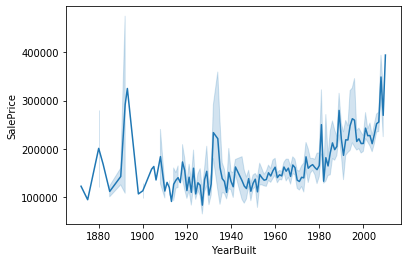

In [89]:
sns.lineplot(x='YearBuilt',y='SalePrice',data=n_df)
plt.show()

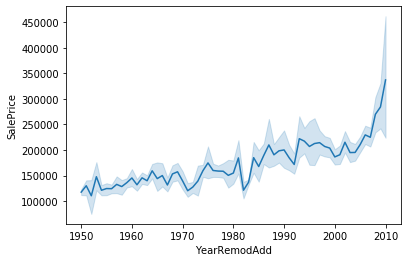

In [90]:
sns.lineplot(x='YearRemodAdd',y='SalePrice',data=n_df)
plt.show()

In [91]:
if 'YearRemodAdd' in selected_feat:
    print('its there')
else:
    print('its not there')

its not there


In [92]:
n_df['gap'] = n_df['YrSold']-n_df['YearRemodAdd']

In [93]:
n_df.head()

Id  MSSubClass  LotFrontage  LotArea  Street  Alley  LotShape  LandContour  \
0   1          60         65.0     8450       1      0         3            3   
1   2          20         80.0     9600       1      0         3            3   
2   3          60         68.0    11250       1      0         2            3   
3   4          70         60.0     9550       1      0         2            3   
4   5          60         84.0    14260       1      0         2            3   

   Utilities  LandSlope  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0          3          2            7            5       2003          2003   
1          3          2            6            8       1976          1976   
2          3          2            7            5       2001          2002   
3          3          2            7            5       1915          1970   
4          3          2            8            5       2000          2000   

   MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  \
0       196.0          4          3         4         3             0   
1         0.0          3          3         4         3             3   
2       162.0          4          3         4         3             1   
3         0.0          3          3         3         4             0   
4       350.0          4          3         4         3             2   

   BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0             6         706             1           0        150          856   
1             5         978             1           0        284         1262   
2             6         486             1           0        434          920   
3             5         216             1           0        540          756   
4             6         655             1           0        490         1145   

   HeatingQC  CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          5           1       856       854             0       1710   
1          5           1      1262         0             0       1262   
2          5           1       920       866             0       1786   
3          4           1       961       756             0       1717   
4          5           1      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

   KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  \
0            4             8           7           0            0   
1            3             6           7           1            3   
2            4             6           7           1            3   
3            4             7           7           1            4   
4            4             9           7           1            3   

   GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond  \
0       2003.0             2           2         548           3           3   
1       1976.0             2           2         460           3           3   
2       2001.0             2           2         608           3           3   
3       1998.0             1           3         642           3           3   
4       2000.0             2           3         836           3           3   

   PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0           2           0           61              0          0            0   
1           2         298            0              0          0            0   
2           2           0           42              0   

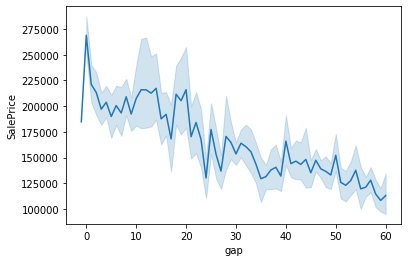

In [94]:
sns.lineplot(x='gap', y='SalePrice', data=n_df)

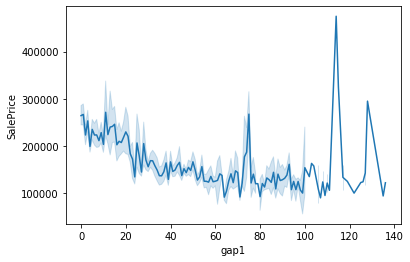

In [95]:
n_df['gap1'] = n_df['YrSold']-n_df['YearBuilt']
sns.lineplot(x='gap1',y='SalePrice',data=n_df)

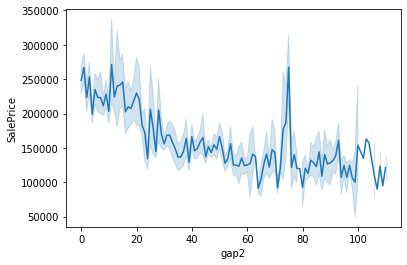

In [96]:
n_df['gap2'] = np.where(n_df['gap1']>110, 0, n_df['gap1'])
#n_df['gap2'] = np.where(n_df['gap1'] in range(70,80) , 0, n_df['gap1'])
sns.lineplot(x='gap2',y='SalePrice',data=n_df)